In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/csv/submissions.csv")
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)
print(df.columns)
df.sample(5)

Index(['id', 'contestId', 'creationTimeSeconds', 'relativeTimeSeconds',
       'programmingLanguage', 'verdict', 'testset', 'passedTestCount',
       'timeConsumedMillis', 'memoryConsumedBytes', 'index', 'name', 'type',
       'rating', 'tags', 'members', 'participantType', 'ghost',
       'startTimeSeconds', 'points', 'room', 'teamId', 'teamName',
       'problemsetName'],
      dtype='object')


,id,contestId,creationTimeSeconds,relativeTimeSeconds,programmingLanguage,verdict,testset,passedTestCount,timeConsumedMillis,memoryConsumedBytes,...,tags,members,participantType,ghost,startTimeSeconds,points,room,teamId,teamName,problemsetName
178243,54194803,1167.0,1557934085,3185,GNU C++14,OK,TESTS,74,218,26112000,...,"['binary search', 'combinatorics', 'data struc...",[{'handle': 'natsugiri'}],CONTESTANT,False,1.557931e+09,NaN,NaN,NaN,NaN,NaN
72054,40237638,101158.0,1531411350,7350,GNU C++17,OK,TESTS,39,2246,15769600,...,[],[{'handle': 'DmitryGrigorev'}],VIRTUAL,False,1.531404e+09,NaN,NaN,NaN,NaN,NaN
117062,4176323,333.0,1374914748,948,GNU C++,WRONG_ANSWER,PRETESTS,4,30,0,...,['greedy'],[{'handle': 'Swistakk'}],CONTESTANT,False,1.374914e+09,500.0,4.0,NaN,NaN,NaN
135191,58186087,1199.0,1564765924,2147483647,Python 3,OK,TESTS,40,763,8499200,...,['implementation'],[{'handle': 'neal'}],PRACTICE,False,1.564497e+09,500.0,NaN,NaN,NaN,NaN
181061,2616403,246.0,1353514990,3190,GNU C++,WRONG_ANSWER,PRETESTS,2,15,1638400,...,"['brute force', 'dfs and similar', 'graphs']",[{'handle': 'natsugiri'}],OUT_OF_COMPETITION,False,1.353512e+09,2000.0,104.0,NaN,NaN,NaN


## Let's find out 500 most attempted questions (by top 100 users)

In [3]:
len(set(df['name'])) # Number of questions solved by these 100 users

12641

In [135]:
counter=collections.Counter(df['name'])
print(counter.most_common(50))

[('Antiplagiarism', 1313), ('Scheduler for Invokers', 855), ('Huawei Graph Mining Challenge', 805), ("I'm Feeling Lucky!", 507), ('Maximal Independent Set', 428), ('Tree Queries', 396), ('BuberPool Taxi Optimization', 386), ('Game', 340), ('Numbers Joke', 312), ('University Schedule', 312), ('Elections', 298), ('RC Kaboom Show', 296), ('Awesome Substrings', 282), ('Party', 278), ('Ski Accidents', 276), ('Birthday', 276), ('Tourism', 270), ('Arpa’s letter-marked tree and Mehrdad’s Dokhtar-kosh paths', 259), ('Lucky Tickets', 258), ('Kuroni and the Punishment', 257), ('Interactive LowerBound', 249), ('Destiny', 248), ('X-OR', 242), ('Picking Strings', 235), ('Berserk Robot ', 234), ('Tree', 233), ('New Year and Finding Roots', 228), ('Numbers', 225), ('Big Data', 221), ('Perfect Encoding', 220), ('Almost Same Distance', 217), ('Nastya and Unexpected Guest', 216), ('HQ', 216), ('Sasha Circle', 215), ('Permutations', 215), ('Ghd', 215), ('Optimal Point', 210), ('Nested Rubber Bands', 209),

(array([ 2.,  1.,  1.,  2.,  1.,  1.,  3.,  1.,  1.,  1.,  3.,  1.,  1.,
         2.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  3.,  3.,  2.,
         2.,  2.,  1.,  1.,  3.,  2.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,
         1.,  1.,  2.,  2.,  2.,  7.,  1.,  1.,  1.,  4.,  1.,  4.,  6.,
         3.,  3.,  2.,  4.,  2.,  7.,  8.,  4.,  2.,  2.,  8.,  3.,  4.,
         9.,  2.,  4.,  8.,  6.,  6.,  6.,  7.,  7., 10.,  9.,  5.,  5.,
         7., 14.,  5.,  6., 12.,  6.,  4.,  7., 15.,  7.,  5., 25., 10.,
        11., 12., 25., 17., 14., 15., 14., 23., 14.]),
 array([  0.  ,   1.29,   2.58,   3.87,   5.16,   6.45,   7.74,   9.03,
         10.32,  11.61,  12.9 ,  14.19,  15.48,  16.77,  18.06,  19.35,
         20.64,  21.93,  23.22,  24.51,  25.8 ,  27.09,  28.38,  29.67,
         30.96,  32.25,  33.54,  34.83,  36.12,  37.41,  38.7 ,  39.99,
         41.28,  42.57,  43.86,  45.15,  46.44,  47.73,  49.02,  50.31,
         51.6 ,  52.89,  54.18,  55.47,  56.76,  58.05,  59.34,  60.63,
  

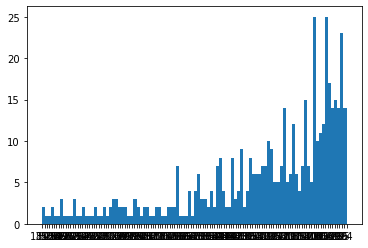

In [90]:
plt.hist(np.array(counter.most_common(500))[:,1],bins=100)

In [115]:
most_common_problems = set(np.array(counter.most_common(1))[:,0])

In [112]:
'XOR Inverse' in most_common_problems

False

### Generating the data in the format required by DKT

In [4]:
import os
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x = df['name'].fillna('No Name')
le.fit(x)

LabelEncoder()

In [5]:
le.classes_

array([' A+B', '!Hasan', '"Bulls and Cows"', ..., 'Язык PJ', 'Языки',
       'Ящик Пандоры'], dtype=object)

True

In [18]:
model_train_data = open('train.txt', 'w')
model_test_data = open('test.txt','w')
user_counter = 0
for file_name in os.listdir("./data/csv/submissions"):
    model_data_file = model_train_data if np.random.rand() <= 0.8 else model_test_data
    user_counter += 1
    cf_handle = file_name.replace("submissions-","").replace(".csv","")
    print(cf_handle)
    this_user_submission_df = pd.read_csv(f"./data/csv/submissions/{file_name}")
    n = len(this_user_submission_df)
    
    exercise_numbers = map(str,le.transform(this_user_submission_df['name'].fillna("No Name")))
    was_solved = list(map(str,map(int,this_user_submission_df['verdict'] == "OK")))
    
    model_data_file.write(str(n) + '\n') # Number of questions attempted by the student
    model_data_file.write(','.join(exercise_numbers) + '\n')
    model_data_file.write(','.join(was_solved) + '\n')

model_train_data.close()
model_test_data.close()

QAQAutoMaton
zeronumber
SSRS_
Maksim1744
al13n
CodePlatina
Polygon-yg
Tlatoani
Benq
neal
freak93
Pigbrain
Fuyuki
receed
ugly2333
conflict
Petr
natsugiri
gamegame
mango_lassi
amethyst0
oleh1421
Jatana
Isonan
kmjp
Sooke
black_horse2014
stevenkplus
Hazyknight
yosupo
ecnerwala
kotamanegi
pashka
majk
300iq
heno239
cdkrot
scanhex
DmitryGrigorev
emma
izban
Kostroma
mtsd
tmwilliamlin168
I_love_chickpea
djq_fpc
_h_
Nebuchadnezzar
jiangly
SirShokoladina
voover
Marcin_smu
Um_nik
antontrygubO_o
kraborak
aid
Nezzar
Radewoosh
nuip
eatmore
Amoo_Safar
Egor
dreamoon_love_AA
dlalswp25
hos.lyric
Itst
blackbori
tfg
ksun48
Farhod_Farmon
RAVEman
Martin53
uwi
Endagorion
hitonanode
Aidos
yhx-12243
ainta
Chelly
kefaa2
Golovanov399
dario2994
noimi
Kamfucius
Swistakk
Toxel
Noam527
tourist
PinkieRabbit
wucstdio
I_love_Tanya_Romanova
8-_-8
Errichto
hank55663
LayCurse
kort0n
saketh
tatyam
tlwpdus
maroonrk


In [145]:
print(user_counter)

100
